In [320]:
#importing packages
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd

In [321]:
#loading the data set
from sklearn.datasets import load_iris
iris = load_iris()
print(iris.DESCR)
X, t = load_iris(return_X_y=True)

.. _iris_dataset:

Iris plants dataset
--------------------

**Data Set Characteristics:**

    :Number of Instances: 150 (50 in each of three classes)
    :Number of Attributes: 4 numeric, predictive attributes and the class
    :Attribute Information:
        - sepal length in cm
        - sepal width in cm
        - petal length in cm
        - petal width in cm
        - class:
                - Iris-Setosa
                - Iris-Versicolour
                - Iris-Virginica
                
    :Summary Statistics:

    ============== ==== ==== ======= ===== ====================
                    Min  Max   Mean    SD   Class Correlation
    ============== ==== ==== ======= ===== ====================
    sepal length:   4.3  7.9   5.84   0.83    0.7826
    sepal width:    2.0  4.4   3.05   0.43   -0.4194
    petal length:   1.0  6.9   3.76   1.76    0.9490  (high!)
    petal width:    0.1  2.5   1.20   0.76    0.9565  (high!)
    ============== ==== ==== ======= ===== ===========

In [322]:
#splitting the data into the trainig and test sets
from sklearn.model_selection import train_test_split
X_train, X_test, t_train, t_test = train_test_split(X, t, test_size = 1/4, random_state = 3)

In [323]:
print(X_train.shape)

(112, 4)


In [324]:
#use only last two features for prediction
X_train = X_train[:,2:]
X_test = X_test[:,2:]

print(X_train.shape)

(112, 2)


In [325]:
#separate classes
#plot data for features 2 and 3
#separate training data for different classes

#class 0  
i0 = np.asarray(np.nonzero(t_train==0)) #indexes where class is 0
print(i0)
[m,n] = i0.shape
print([m,n])
X_train_0 = np.zeros((n,2))
t_train_0 = np.zeros(n)
#print(t_train_0)
#print(X_train_0)
for i in range(n):
    X_train_0[i,:] = X_train[i0[0,i],:] 

[[  4   5   8  12  13  17  19  22  23  26  27  31  34  35  42  43  50  52
   57  59  63  65  72  77  80  82  83  84  87  88  90 100 103 108 109]]
[1, 35]


In [326]:
#class 1
i1 = np.asarray(np.nonzero(t_train==1)) #indexes where class is 1
print(i1)
[m,n] = i1.shape
print([m, n])
X_train_1 = np.zeros((n,2))
t_train_1 = np.ones(n)
#print(t_train_1)
for i in range(n):
    X_train_1[i,:] = X_train[i1[0,i],:] 
#print(X_train_1)

[[  1   3   7   9  11  15  16  21  25  28  33  39  40  41  46  48  53  54
   58  60  61  62  67  69  71  74  76  78  81  85  91  93  96  97  99 101
  102 104]]
[1, 38]


In [327]:
#class 2
i2 = np.asarray(np.nonzero(t_train==2)) #indexes where class is 0
print(i2)
[m,n] = i2.shape
#print(n)
X_train_2 = np.zeros((n,2))
t_train_2 = np.ones(n)
t_train_2 += 1
#print(t_train_2)
for i in range(n):
    X_train_2[i,:] = X_train[i2[0,i],:] 
#print(X_train_2)

[[  0   2   6  10  14  18  20  24  29  30  32  36  37  38  44  45  47  49
   51  55  56  64  66  68  70  73  75  79  86  89  92  94  95  98 105 106
  107 110 111]]


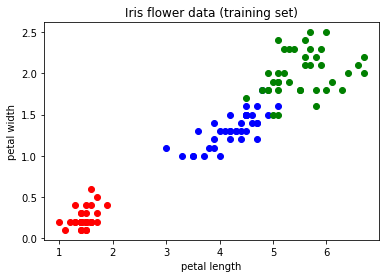

In [328]:
#plot classes
plt.scatter(X_train_0[:,0], X_train_0[:,1], color = 'red')
plt.scatter(X_train_1[:,0], X_train_1[:,1], color = 'blue')
plt.scatter(X_train_2[:,0], X_train_2[:,1], color = 'green')
plt.title('Iris flower data (training set)')
plt.xlabel('petal length')
plt.ylabel('petal width')
plt.savefig('iris.png')
plt.show()


In [329]:
#convert to binary classification change 2 to 1, 1 to 0
#tt_train and tt_test store the targets after the convertion
tt_train = t_train.copy()
tt_test = t_test.copy()
M = len(X_test)
N = len(X_train)
for i in range(M):
    if(t_test[i]==1):
        tt_test[i] = 0
    elif(t_test[i]==2):
        tt_test[i] = 1
    
for i in range(N):
    if(t_train[i]==1):
        tt_train[i] = 0
    elif(t_train[i]==2):
        tt_train[i] = 1
#print(t_train)
#print(tt_train) 